In [3]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from dask.distributed import Client, progress

In [2]:
client = Client()

/Users/jonniebarnsley/opt/anaconda3/envs/phd/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52070 instead
  warnings.warn(


In [3]:
run_nums = range(1, 8)  # or whatever range of runs you have
futures = []
path = Path('/Users/jonniebarnsley/Downloads/dThicknessdt')

In [4]:
for run in run_nums:
    file_path = path / f'lasagne_run0{run}_dThicknessdt_3lev.nc'
    ds = xr.open_dataset(file_path, chunks='auto')
    norm = abs(ds.dThicknessdt).sum(dim=['x', 'y'])
    futures.append(client.compute(norm.rename(f'dThicknessdt_L1_norm_run{run}')))

progress(futures)

VBox()

In [7]:
results = [f.result() for f in futures]

In [12]:
ensemble = xr.concat(results, dim='run')
ensemble = ensemble.assign_coords(run=run_nums)
ensemble.name = 'dThicknessdt_L1_norm'
ensemble

<xarray.DataArray 'dThicknessdt_L1_norm' (run: 7, time: 155)>
array([[      0.  , 8499943.43, 8104344.21, ..., 2825025.69, 2814364.4 ,
        2803981.62],
       [      0.  , 8517217.86, 8118151.99, ..., 2854196.48, 2843320.46,
        2832669.82],
       [      0.  , 8426472.95, 8011744.85, ..., 2703858.65, 2692969.25,
        2682439.2 ],
       ...,
       [      0.  , 8524560.61, 8123205.83, ..., 2838517.65, 2827767.33,
        2817834.83],
       [      0.  , 8196032.06, 7871472.75, ..., 2823393.72, 2814666.75,
        2804873.4 ],
       [      0.  , 8853682.17, 8319773.14, ..., 3116076.46, 3053276.15,
        2926709.53]])
Coordinates:
  * time     (time) float64 0.0 0.1 0.2 0.3 0.4 0.5 ... 14.6 14.7 14.8 14.9 15.0
  * run      (run) int64 1 2 3 4 5 6 7

In [1]:
for run in run_nums:
    plt.plot(ensemble.time[1:], ensemble.sel(run=run)[1:], label=f'Run {run}', lw=0.8, alpha=0.8)
plt.ylabel('$\|\ dH/dt\ \|_1$')
plt.xlabel('Time (yrs)')

NameError: name 'run_nums' is not defined

In [32]:
ensemble.to_netcdf(
    '/Users/jonniebarnsley/data/inversions/axial/axial_lasagne_inv_dThicknessdt_norm.nc',
    mode='w',
    format='NETCDF4',
    encoding={'dThicknessdt_L1_norm': {'zlib': True, 'complevel': 5}},
)

Text(0.5, 0, 'time (years)')

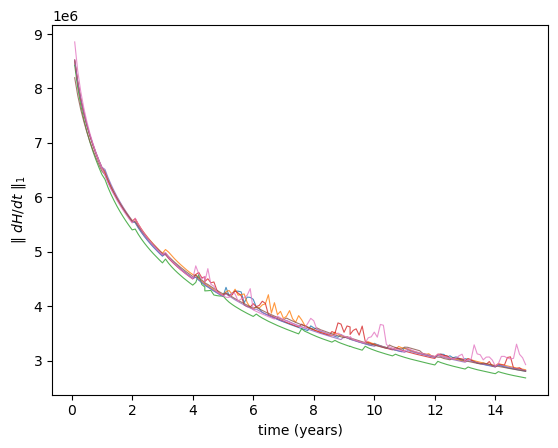

In [8]:
ensemble = xr.open_dataset('/Users/jonniebarnsley/data/inversions/axial/axial_lasagne_inv_dThicknessdt_norm.nc')
for run in range(1, 8):
    plt.plot(ensemble.time[1:], ensemble.sel(run=run).dThicknessdt_L1_norm[1:], label=f'Run {run}', lw=0.8, alpha=0.8)
plt.ylabel('$\|\ dH/dt\ \|_1$')
plt.xlabel('time (years)')

In [6]:
ensemble

<xarray.Dataset>
Dimensions:               (time: 155, run: 7)
Coordinates:
  * time                  (time) float64 0.0 0.1 0.2 0.3 ... 14.7 14.8 14.9 15.0
  * run                   (run) int64 1 2 3 4 5 6 7
Data variables:
    dThicknessdt_L1_norm  (run, time) float64 ...